# Libraries

In [19]:
# Library

from importlib import reload
#from Bitbucket.cointegration import calibration
#reload(calibration)
import pandas as pd
import numpy as np
import itertools
import statsmodels.tsa.api as sm
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family="serif")

# Load data

Import data from *bonds.csv* file and then identify a shorter period on which make the analysis. It is desirable to have a period for which obervation are already quite stable, therefore a plot is used to identify it. 

In [20]:
# Data

bonds = pd.read_csv( 'bonds.csv', index_col='Date', parse_dates=['Date'])
bonds

,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,Short_Sterling,Short-Term_Euro-BTP,UK_Gilt,US_10,US_2,US_30,US_5
Date,,,,,,,,,,,,,,,
2014-01-02,99.74,124.41,115.81,139.12,131.55,110.295,121.60,143.26,99.43,109.42,106.52,123.22,109.91,128.62,119.41
2014-01-03,99.74,124.45,116.05,139.09,131.62,110.295,121.40,143.27,99.43,109.52,106.60,123.17,109.88,128.53,119.35
2014-01-06,99.72,124.61,116.13,139.54,131.88,110.295,121.96,143.54,99.44,109.46,107.21,123.47,109.90,129.03,119.51
2014-01-07,99.71,124.72,116.68,139.76,132.22,110.295,122.28,143.81,99.44,109.63,107.44,123.69,109.91,129.31,119.62
2014-01-08,99.71,124.60,116.61,139.54,132.10,110.265,121.88,143.73,99.44,109.54,107.15,123.11,109.83,128.78,119.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,100.53,135.48,151.40,175.51,170.16,112.355,227.00,152.10,99.96,114.02,135.44,138.45,110.41,173.45,125.61
2020-11-27,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.05,99.96,114.02,135.26,138.55,110.41,173.88,125.67
2020-11-29,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.06,99.96,114.02,135.26,138.16,110.40,174.95,125.98


<AxesSubplot:xlabel='Date'>

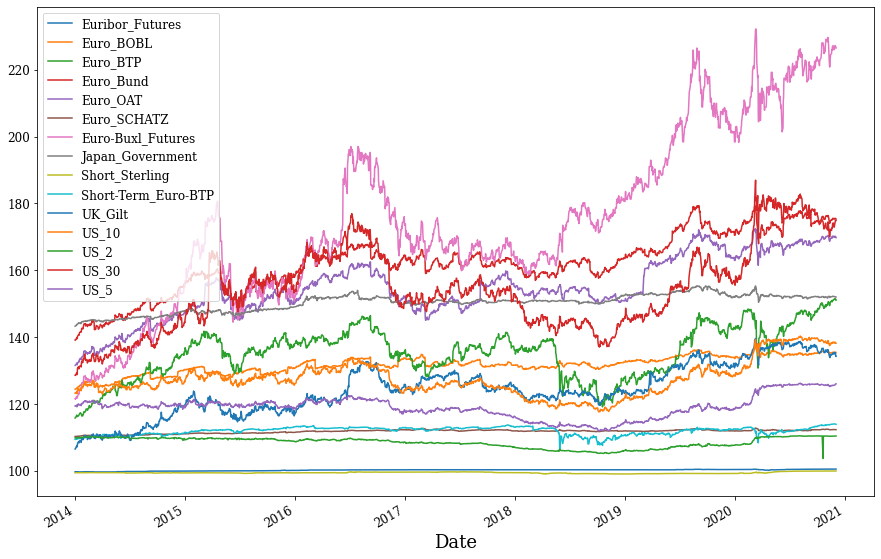

In [21]:
bonds.plot(figsize=(15,10))

# plot series

(18262.0, 18443.0)

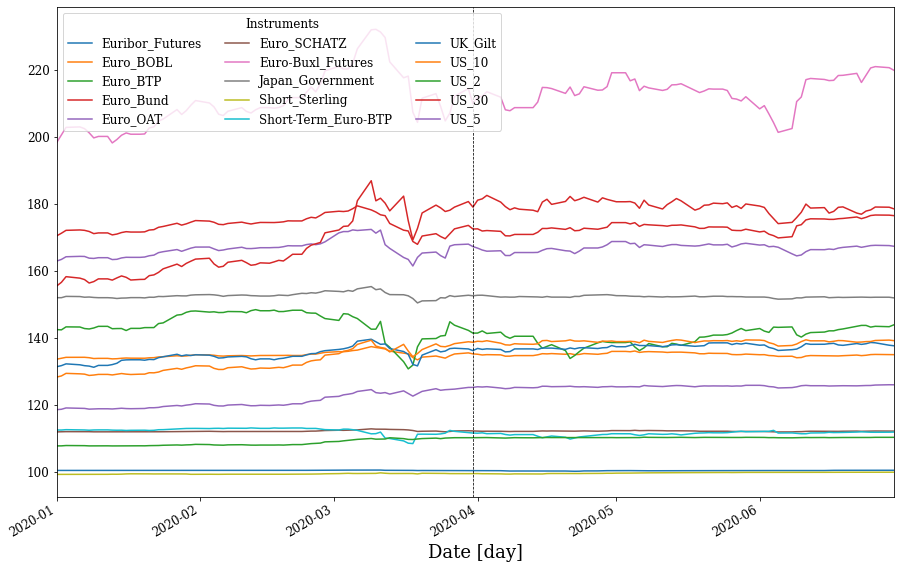

In [28]:
in_sample=slice("2020-01-01", "2020-03-31")
out_sample=slice("2020-04-01", "2020-06-30")
x = bonds[in_sample.start:out_sample.stop]
# x -= x.iloc[0]
# From the plot above I've identified a shorter period with a quite stable situation
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x.plot(ax=ax)
ax.axvline(in_sample.stop, color="black", linestyle="--", linewidth=0.75)
ax.legend(loc="best", title="Instruments", ncol=3)
ax.set_xlabel("Date [day]")
ax.set_xlim((x.index[0], x.index[-1]))

In [5]:
bonds_in = bonds['2017-07':'2017-09'] #Q3 of 2017
bonds_out = bonds['2017-11':'2017-12'] #Q4 0f 2017

# Find weight vector for an instance

In [6]:
ts = calibration.TwoStepsCalibration(bonds_in, n_obs=bonds_in.shape[0])
y, res = ts._crossing_stats(bonds_in, 4, 0.5, 2, 2)
y

array([-0.76712402,  0.2295031 , -0.52157342,  0.29463867])

In [7]:
y, res = ts._cointegration_techinque(bonds_in, criterion='crossing_stats', k=4, nu=0.5, p=2)
y

array([-0.76810269,  0.22860915, -0.52442206,  0.28764198])

# Grid search